In [1]:
import tensorflow as tf
import numpy as np
import random

import matplotlib.pyplot as plt

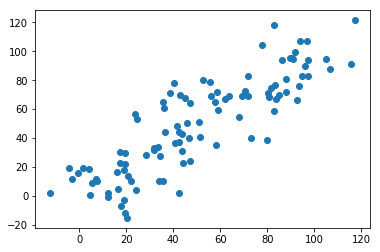

In [2]:
# points = np.array([(1,1), (2,1.5), (3,2), (4,2.5), (5, 3), (6,8)])
# points = np.array([(1,1), (2,1.5), (3,2), (4,2.5), (5, 3), (6,8)])
points = np.array([(i + (random.random() - 0.5) * 50, i + (random.random() - 0.5) * 50) for i in range(100)])

xs = points[:, 0]
xs = np.reshape(xs, (len(xs), 1))
ys = points[:, 1]
ys = np.reshape(ys, (len(ys), 1))

plt.scatter(xs, ys)
plt.show()

In [3]:
x = tf.placeholder(tf.float32, (None, 1))
y = tf.placeholder(tf.float32, (None, 1))
w = tf.Variable(tf.truncated_normal([1, 1]))
b = tf.Variable(tf.truncated_normal([1]))

init = tf.global_variables_initializer()

In [4]:
learning_rate = 0.0001
num_epochs = 10000

h = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square(h - y))

training_operation = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

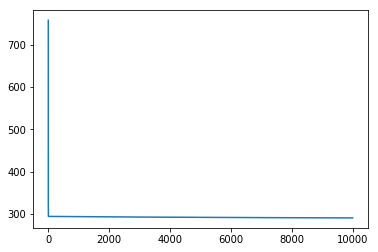

In [5]:
sess = tf.Session()
sess.run(init)
losses = []

for epoch in range(num_epochs):
  _, current_loss, ws, bs = sess.run([training_operation, loss, w, b], feed_dict={ x:xs, y:ys })
  losses.append(current_loss)
  
plt.plot(losses)
plt.show()

[[ 0.92866415]] [ 2.01798248]


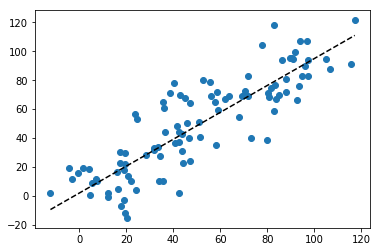

In [7]:
test_xs = [[xs.min()], [xs.max()]]
predicted_ys = sess.run(h, feed_dict={ x: test_xs })

plt.scatter(xs, ys)
print(ws, bs)

plt.plot(test_xs, predicted_ys, 'k--')
plt.show()

sess.close()